# Data Aggregation and Group Operations

In [3]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [4]:
pd.options.display.notebook_repr_html = False

In [5]:
%matplotlib inline

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## GroupBy mechanics

In [7]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randint(10, size=5),
                'data2' : np.random.randint(10, size=5)})
df

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

In [20]:
grouped = df['data1'].groupby(df['key1'])
grouped
grouped2 = df.data1.groupby(df.key1)
grouped2

In [21]:
df['data1']#df[]와 df[[]]의 차이
df.data1
type(df[['data1']])
df[['data1']].groupby(df.key1)

0    2
1    5
2    1
3    4
4    9
Name: data1, dtype: int32

0    2
1    5
2    1
3    4
4    9
Name: data1, dtype: int32

pandas.core.frame.DataFrame

In [14]:
df['key1']
df.key1

0    a
1    a
2    b
3    b
4    a
Name: key1, dtype: object

0    a
1    a
2    b
3    b
4    a
Name: key1, dtype: object

In [15]:
grouped.mean()

key1
a    5.333333
b    2.500000
Name: data1, dtype: float64

In [16]:
[df.key1, df.key2]

[0    a
 1    a
 2    b
 3    b
 4    a
 Name: key1, dtype: object, 0    one
 1    two
 2    one
 3    two
 4    one
 Name: key2, dtype: object]

In [19]:
df
means = df['data1'].groupby([df['key1'], df['key2']]).mean() 
#그룹에 대해서는 인자의 순서 중요

means2 = df.data1.groupby([df.key1, df.key2]).mean()
means
means2

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

key1  key2
a     one     5.5
      two     5.0
b     one     1.0
      two     4.0
Name: data1, dtype: float64

key1  key2
a     one     5.5
      two     5.0
b     one     1.0
      two     4.0
Name: data1, dtype: float64

In [22]:
means.unstack()

key2  one  two
key1          
a     5.5  5.0
b     1.0  4.0

In [23]:
df
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

California  2005    5
            2006    1
Ohio        2005    3
            2006    9
Name: data1, dtype: int32

In [25]:
df.groupby('key1').mean()

         data1     data2
key1                    
a     5.333333  2.666667
b     2.500000  3.500000

In [26]:
df.groupby(['key1', 'key2']).mean()

           data1  data2
key1 key2              
a    one     5.5    3.0
     two     5.0    2.0
b    one     1.0    1.0
     two     4.0    6.0

In [27]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### Iterating over groups

In [28]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
4      9      1    a  one
b
   data1  data2 key1 key2
2      1      1    b  one
3      4      6    b  two


In [29]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)
    print()

('a', 'one')
   data1  data2 key1 key2
0      2      5    a  one
4      9      1    a  one

('a', 'two')
   data1  data2 key1 key2
1      5      2    a  two

('b', 'one')
   data1  data2 key1 key2
2      1      1    b  one

('b', 'two')
   data1  data2 key1 key2
3      4      6    b  two



In [30]:
for k, group in df.groupby(['key1', 'key2']):
    print(k)
    print(group)
    print()

('a', 'one')
   data1  data2 key1 key2
0      2      5    a  one
4      9      1    a  one

('a', 'two')
   data1  data2 key1 key2
1      5      2    a  two

('b', 'one')
   data1  data2 key1 key2
2      1      1    b  one

('b', 'two')
   data1  data2 key1 key2
3      4      6    b  two



In [31]:
list(df.groupby('key1'))

[('a',    data1  data2 key1 key2
  0      2      5    a  one
  1      5      2    a  two
  4      9      1    a  one), ('b',    data1  data2 key1 key2
  2      1      1    b  one
  3      4      6    b  two)]

In [36]:
type(['a','b','c','d'])

list

In [34]:
dict(['a','b','c','d'])

SyntaxError: unexpected EOF while parsing (<ipython-input-34-8832464e943b>, line 1)

In [32]:
pieces = dict(list(df.groupby('key1')))
pieces
pieces['b']

{'a':    data1  data2 key1 key2
 0      2      5    a  one
 1      5      2    a  two
 4      9      1    a  one, 'b':    data1  data2 key1 key2
 2      1      1    b  one
 3      4      6    b  two}

   data1  data2 key1 key2
2      1      1    b  one
3      4      6    b  two

In [37]:
df.groupby('key1')
list(df.groupby('key1'))
list(df.groupby('key1'))
dict(list(df.groupby('key1')))

[('a',    data1  data2 key1 key2
  0      2      5    a  one
  1      5      2    a  two
  4      9      1    a  one), ('b',    data1  data2 key1 key2
  2      1      1    b  one
  3      4      6    b  two)]

[('a',    data1  data2 key1 key2
  0      2      5    a  one
  1      5      2    a  two
  4      9      1    a  one), ('b',    data1  data2 key1 key2
  2      1      1    b  one
  3      4      6    b  two)]

{'a':    data1  data2 key1 key2
 0      2      5    a  one
 1      5      2    a  two
 4      9      1    a  one, 'b':    data1  data2 key1 key2
 2      1      1    b  one
 3      4      6    b  two}

In [38]:
dict(df.groupby('key1'))

TypeError: attribute of type 'str' is not callable

In [39]:
df.dtypes
type(df.dtypes)

data1     int32
data2     int32
key1     object
key2     object
dtype: object

pandas.core.series.Series

In [40]:
df
grouped = df.groupby(df.dtypes, axis=1)
dict(list(grouped))

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

{dtype('int32'):    data1  data2
 0      2      5
 1      5      2
 2      1      1
 3      4      6
 4      9      1, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

In [41]:
s1 = df.dtypes[[3, 0, 1, 2]]; s1

key2     object
data1     int32
data2     int32
key1     object
dtype: object

In [42]:
grouped2 = df.groupby(s1, axis=1)
df
dict(list(grouped))

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

{dtype('int32'):    data1  data2
 0      2      5
 1      5      2
 2      1      1
 3      4      6
 4      9      1, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

### Selecting a column or subset of columns

In [43]:
df.groupby('key1')['data1']
df.groupby('key1')[['data2']]

In [44]:
df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

In [45]:
df.groupby(['key1', 'key2'])[['data2']].mean()

           data2
key1 key2       
a    one       3
     two       2
b    one       1
     two       6

In [47]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped

In [48]:
s_grouped.mean()

key1  key2
a     one     3
      two     2
b     one     1
      two     6
Name: data2, dtype: int32

### Grouping with dicts and Series

In [49]:
people = DataFrame(np.random.randint(3, size=(5, 5)),
                   columns=['a', 'b', 'c', 'd', 'e'],
                  )
people.loc[2:3, ['b', 'c']] = np.nan # Add a few NA values
people

   a    b    c  d  e
0  2  1.0  2.0  0  2
1  1  1.0  2.0  1  2
2  2  NaN  NaN  1  1
3  0  NaN  NaN  0  1
4  2  1.0  1.0  2  1

In [50]:
people = DataFrame(np.random.randint(3, size=(5, 5)),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis']
                  )
people.loc[2:3, ['b', 'c']] = np.nan # Add a few NA values
people

        a    b    c  d  e
Joe     0  1.0  2.0  0  1
Steve   0  2.0  0.0  2  0
Wes     0  NaN  NaN  0  2
Jim     0  0.0  2.0  1  2
Travis  2  2.0  1.0  2  2

In [51]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'
          }
mapping

{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [52]:
by_column = people.groupby(mapping, axis=1)
list(by_column)
by_column.sum()

[('blue',           c  d
  Joe     2.0  0
  Steve   0.0  2
  Wes     NaN  0
  Jim     2.0  1
  Travis  1.0  2), ('red',         a    b  e
  Joe     0  1.0  1
  Steve   0  2.0  0
  Wes     0  NaN  2
  Jim     0  0.0  2
  Travis  2  2.0  2)]

        blue  red
Joe      2.0  2.0
Steve    2.0  2.0
Wes      0.0  2.0
Jim      3.0  2.0
Travis   3.0  6.0

In [53]:
map_series = Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [54]:
people.groupby(map_series, axis=1).count()
people.groupby(map_series, axis=1).sum()

        blue  red
Joe        2    3
Steve      2    3
Wes        1    2
Jim        2    3
Travis     2    3

        blue  red
Joe      2.0  2.0
Steve    2.0  2.0
Wes      0.0  2.0
Jim      3.0  2.0
Travis   3.0  6.0

### Grouping with functions

In [58]:
people

people.groupby(len).sum() #len을 이용해 이름 길이별로 묶는다.
people.T.groupby(len, axis=1).sum()

        a    b    c  d  e
Joe     0  1.0  2.0  0  1
Steve   0  2.0  0.0  2  0
Wes     0  NaN  NaN  0  2
Jim     0  0.0  2.0  1  2
Travis  2  2.0  1.0  2  2

<function len>

   a    b    c  d  e
3  0  1.0  4.0  1  5
5  0  2.0  0.0  2  0
6  2  2.0  1.0  2  2

     3    5    6
a  0.0  0.0  2.0
b  1.0  2.0  2.0
c  4.0  0.0  1.0
d  1.0  2.0  2.0
e  5.0  0.0  2.0

In [60]:
key_list = ['one', 'one', 'one', 'two', 'two']
people
people.groupby([len, key_list]).min()

        a    b    c  d  e
Joe     0  1.0  2.0  0  1
Steve   0  2.0  0.0  2  0
Wes     0  NaN  NaN  0  2
Jim     0  0.0  2.0  1  2
Travis  2  2.0  1.0  2  2

       a    b    c  d  e
3 one  0  1.0  2.0  0  1
  two  0  0.0  2.0  1  2
5 one  0  2.0  0.0  2  0
6 two  2  2.0  1.0  2  2

In [57]:
people.groupby([len, 'd']).min()

     a    b    c  e
  d                
3 0  0  1.0  2.0  1
  1  0  0.0  2.0  2
5 2  0  2.0  0.0  0
6 2  2  2.0  1.0  2

### Grouping by index levels

In [61]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names=['cty', 'tenor'])
columns
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

MultiIndex(levels=[['JP', 'US'], [1, 3, 5]],
           labels=[[1, 1, 1, 0, 0], [0, 1, 2, 0, 1]],
           names=['cty', 'tenor'])

cty          US                            JP          
tenor         1         3         5         1         3
0      1.808867 -1.105941  0.344533  1.553014  0.547801
1      0.256437 -1.512917 -0.878108 -0.017276 -0.136594
2     -0.730109  1.398268 -0.336922 -0.004680 -0.760234
3     -1.246113  0.278846 -0.473200 -1.742125 -0.968082

In [62]:
hier_df.groupby(level='cty', axis=1).count()

cty  JP  US
0     2   3
1     2   3
2     2   3
3     2   3

## Data aggregation

In [63]:
df

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

In [64]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.5)#그룹에 대한 값의 50%
grouped.quantile(0.9)['data1']#그룹에 대한 값의 90%

key1
a    5.0
b    2.5
Name: data1, dtype: float64

key1
a    8.2
b    3.7
Name: data1, dtype: float64

In [65]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
list(grouped) #그룹에 대한 정보가 들어있다.
grouped.agg(peak_to_peak)    # alias for aggregate()
#그룹에 대한 정보를 이용해 집계를 한다. 집계 함수는 정의한 것을 사용한다.
grouped.aggregate(peak_to_peak)

[('a',    data1  data2 key1 key2
  0      2      5    a  one
  1      5      2    a  two
  4      9      1    a  one), ('b',    data1  data2 key1 key2
  2      1      1    b  one
  3      4      6    b  two)]

      data1  data2
key1              
a         7      4
b         3      5

      data1  data2
key1              
a         7      4
b         3      5

In [66]:
grouped.describe()

     data1                                                data2            \
     count      mean       std  min   25%  50%   75%  max count      mean   
key1                                                                        
a      3.0  5.333333  3.511885  2.0  3.50  5.0  7.00  9.0   3.0  2.666667   
b      2.0  2.500000  2.121320  1.0  1.75  2.5  3.25  4.0   2.0  3.500000   

                                           
           std  min   25%  50%   75%  max  
key1                                       
a     2.081666  1.0  1.50  2.0  3.50  5.0  
b     3.535534  1.0  2.25  3.5  4.75  6.0  

In [67]:
tips = pd.read_csv('ch08/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

   total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808
5       25.29  4.71    Male     No  Sun  Dinner     4  0.186240

### Column-wise and multiple function application

In [68]:
grouped = tips.groupby(['sex', 'smoker'])
for (sex, smoker), group in grouped:
    print(sex, smoker)
    print(group)

Female No
     total_bill   tip     sex smoker   day    time  size   tip_pct
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808
11        35.26  5.00  Female     No   Sun  Dinner     4  0.141804
14        14.83  3.02  Female     No   Sun  Dinner     2  0.203641
16        10.33  1.67  Female     No   Sun  Dinner     3  0.161665
18        16.97  3.50  Female     No   Sun  Dinner     3  0.206246
21        20.29  2.75  Female     No   Sat  Dinner     2  0.135535
22        15.77  2.23  Female     No   Sat  Dinner     2  0.141408
29        19.65  3.00  Female     No   Sat  Dinner     2  0.152672
32        15.06  3.00  Female     No   Sat  Dinner     2  0.199203
33        20.69  2.45  Female     No   Sat  Dinner     4  0.118415
37        16.93  3.07  Female     No   Sat  Dinner     3  0.181335
51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
52        34.81  5.20  Female     No   Sun  Dinner  

In [72]:
grouped_pct = grouped['tip_pct']
grouped['tip_pct'].mean()
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [73]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

                   mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [80]:
me = {'foo':'mean', 'bar':'too'}
me['foo']

'mean'

In [82]:
grouped_pct.agg({'foo':'mean','bar': np.std})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


                    foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [74]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

                    foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [83]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

              tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [84]:
result['tip_pct']

               count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [89]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]#tuple를 list에 담음
grouped['tip_pct', 'total_bill'].agg(ftuples)

list

                   tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451517
Male   No         0.160669   0.001751    19.791237  76.152961
       Yes        0.152771   0.008206    22.284500  98.244673

In [90]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

                tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [91]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

                tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

### Returning aggregated data in "unindexed" form

In [92]:
tips.groupby(['sex', 'smoker'], as_index=False).mean()

      sex smoker  total_bill       tip      size   tip_pct
0  Female     No   18.105185  2.773519  2.592593  0.156921
1  Female    Yes   17.977879  2.931515  2.242424  0.182150
2    Male     No   19.791237  3.113402  2.711340  0.160669
3    Male    Yes   22.284500  3.051167  2.500000  0.152771

## 여성 비흡연자/흡연자, 남성 비흡연자/흡연자 별 평균 팁 비율을 막대그래프로, 여성/남성 흡연/비흡연자의 음식값과 팁 비율에 대한 산포도로 나타내 보세요

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

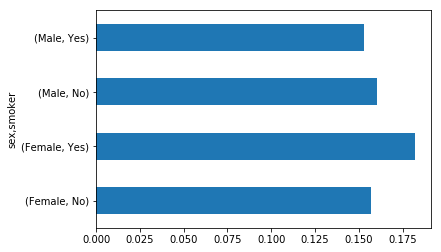

In [94]:
#grouped_pct.mean().plot(kind='bar')
tips.groupby(['sex', 'smoker'])['tip_pct'].mean().plot(kind='barh')

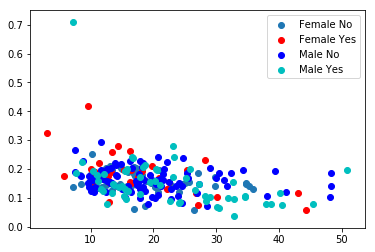

In [95]:
tip_f = tips[tips['sex'] == 'Female']
tip_fn = tip_f[tip_f['smoker'] == 'No']
tip_fy = tip_f[tip_f['smoker'] == 'Yes']
tip_m = tips[tips['sex'] == 'Male']
tip_mn = tip_m[tip_m['smoker'] == 'No']
tip_my = tip_m[tip_m['smoker'] == 'Yes']

plt.scatter(tip_fn['total_bill'], tip_fn['tip_pct'], label='Female No');
plt.scatter(tip_fy['total_bill'], tip_fy['tip_pct'], label='Female Yes', color='r');
plt.scatter(tip_mn['total_bill'], tip_mn['tip_pct'], label='Male No', color='b');
plt.scatter(tip_my['total_bill'], tip_my['tip_pct'], label='Male Yes', color='c');
plt.legend(loc='best');

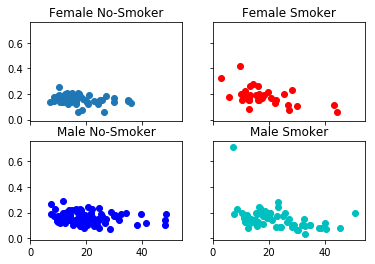

In [96]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
axes = axes.flatten()

tip_f = tips[tips['sex'] == 'Female']
tip_fn = tip_f[tip_f['smoker'] == 'No']
tip_fy = tip_f[tip_f['smoker'] == 'Yes']
tip_m = tips[tips['sex'] == 'Male']
tip_mn = tip_m[tip_m['smoker'] == 'No']
tip_my = tip_m[tip_m['smoker'] == 'Yes']

axes[0].set_title('Female No-Smoker')
axes[0].scatter(tip_fn['total_bill'], tip_fn['tip_pct'], label='Female No');
axes[1].set_title('Female Smoker')
axes[1].scatter(tip_fy['total_bill'], tip_fy['tip_pct'], label='Female Yes', color='r');
axes[2].set_title('Male No-Smoker')
axes[2].scatter(tip_mn['total_bill'], tip_mn['tip_pct'], label='Male No', color='b');
axes[3].set_title('Male Smoker')
axes[3].scatter(tip_my['total_bill'], tip_my['tip_pct'], label='Male Yes', color='c');

## Group-wise operations and transformations

In [97]:
df

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

In [98]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

      mean_data1  mean_data2
key1                        
a       5.333333    2.666667
b       2.500000    3.500000

In [101]:
pd.merge(df, k1_means, left_on='key1', right_index=True)

   data1  data2 key1 key2  mean_data1  mean_data2
0      2      5    a  one    5.333333    2.666667
1      5      2    a  two    5.333333    2.666667
4      9      1    a  one    5.333333    2.666667
2      1      1    b  one    2.500000    3.500000
3      4      6    b  two    2.500000    3.500000

In [102]:
people

        a    b    c  d  e
Joe     0  1.0  2.0  0  1
Steve   0  2.0  0.0  2  0
Wes     0  NaN  NaN  0  2
Jim     0  0.0  2.0  1  2
Travis  2  2.0  1.0  2  2

In [103]:
key = ['one', 'two', 'one', 'two', 'one']
people.groupby(key).mean()

            a    b    c         d         e
one  0.666667  1.5  1.5  0.666667  1.666667
two  0.000000  1.0  1.0  1.500000  1.000000

In [104]:
list(people.groupby(key))
people.groupby(key).transform(np.mean)
#모든 요소들을 평균으로 변환한다.

[('one',         a    b    c  d  e
  Joe     0  1.0  2.0  0  1
  Wes     0  NaN  NaN  0  2
  Travis  2  2.0  1.0  2  2), ('two',        a    b    c  d  e
  Steve  0  2.0  0.0  2  0
  Jim    0  0.0  2.0  1  2)]

               a    b    c         d         e
Joe     0.666667  1.5  1.5  0.666667  1.666667
Steve   0.000000  1.0  1.0  1.500000  1.000000
Wes     0.666667  1.5  1.5  0.666667  1.666667
Jim     0.000000  1.0  1.0  1.500000  1.000000
Travis  0.666667  1.5  1.5  0.666667  1.666667

In [106]:
def demean(arr):
    return arr - arr.mean()
demeaned = people.groupby(key).transform(demean)
#그룹에 대한 평균이 구해지고 arr에서 그룹에 대한 평균을 뺌
demeaned

               a    b    c         d         e
Joe    -0.666667 -0.5  0.5 -0.666667 -0.666667
Steve   0.000000  1.0 -1.0  0.500000 -1.000000
Wes    -0.666667  NaN  NaN -0.666667  0.333333
Jim     0.000000 -1.0  1.0 -0.500000  1.000000
Travis  1.333333  0.5 -0.5  1.333333  0.333333

In [107]:
demeaned.groupby(key).mean()

                a    b    c             d             e
one  7.401487e-17  0.0  0.0  7.401487e-17 -7.401487e-17
two  0.000000e+00  0.0  0.0  0.000000e+00  0.000000e+00

### Apply: General split-apply-combine

In [108]:
tips[:10]
def top(df, n=5, column='tip_pct'):
    #return df.sort_index(by=column)[-n:]
    return df.sort_values(by=column)[-n:]
#dataframe.sort_values: 키를 보고 정렬하는 것이 아니라 값을 보고 정렬한다.
top(tips, n=6)

   total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808
5       25.29  4.71    Male     No  Sun  Dinner     4  0.186240
6        8.77  2.00    Male     No  Sun  Dinner     2  0.228050
7       26.88  3.12    Male     No  Sun  Dinner     4  0.116071
8       15.04  1.96    Male     No  Sun  Dinner     2  0.130319
9       14.78  3.23    Male     No  Sun  Dinner     2  0.218539

     total_bill   tip     sex smoker  day    time  size   tip_pct
109       14.31  4.00  Female    Yes  Sat  Dinner     2  0.279525
183       23.17  6.50    Male    Yes  Sun  Dinner     4  0.280535
232       11.61  3.39    Male     No  Sat  Dinner     2  0.291990
67         3.07  1.00  Female    Yes  Sat  Dinner     1  0.325733
178        9.60  4.00  Female    Yes  Sun  Dinner     2  0.416667
172        7.25  5.15    Male    Yes  Sun  Dinner     2  0.710345

In [109]:
tips.groupby('smoker').apply(top)

            total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [110]:
tips.groupby(['smoker', 'day']).apply(top, n=2, column='total_bill')
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

                 total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  91        22.49   3.50    Male     No   Fri  Dinner     2   
            94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  59        48.27   6.73    Male     No   Sat  Dinner     4   
            212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  112       38.07   4.00    Male     No   Sun  Dinner     3   
            156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 85        34.83   5.17  Female     No  Thur   Lunch     4   
            142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  90        28.97   3.00    Male    Yes   Fri  Dinner     2   
            95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  102       44.30   2.50  Female    Yes   Sat  Dinner     3   
            170       50.81  10.00    Male    Yes  

                 total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  

In [111]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

        count      mean       std       min       25%       50%       75%  \
smoker                                                                      
No      151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   
Yes      93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   

             max  
smoker            
No      0.291990  
Yes     0.710345  

In [119]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [121]:
# tips.groupby('smoker')['tip_pct'].describe()는 내부적으로 아래와 같이 수행된다.
f = lambda x: x.describe()
tips.groupby('smoker')['tip_pct'].apply(f).unstack()

        count      mean       std       min       25%       50%       75%  \
smoker                                                                      
No      151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   
Yes      93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   

             max  
smoker            
No      0.291990  
Yes     0.710345  

#### Suppressing the group keys

In [124]:
tips.groupby('smoker', group_keys=False).apply(top)

     total_bill   tip     sex smoker   day    time  size   tip_pct
88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

### Quantile and bucket analysis

In [125]:
frame = DataFrame({'data1': np.random.randn(1000),
                   'data2': np.random.randn(1000)})
factor = pd.cut(frame.data1, 4)
frame.data1.describe()
factor[:10]
type(factor)

count    1000.000000
mean       -0.032934
std         1.027157
min        -3.092383
25%        -0.751041
50%        -0.044458
75%         0.708859
max         2.825731
Name: data1, dtype: float64

0    (-1.613, -0.133]
1     (-0.133, 1.346]
2     (-0.133, 1.346]
3     (-0.133, 1.346]
4      (1.346, 2.826]
5    (-1.613, -0.133]
6    (-1.613, -0.133]
7      (1.346, 2.826]
8      (1.346, 2.826]
9    (-1.613, -0.133]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.098, -1.613] < (-1.613, -0.133] < (-0.133, 1.346] < (1.346, 2.826]]

pandas.core.series.Series

In [127]:
frame[:10]

      data1     data2
0 -0.709624 -0.405092
1  1.154907 -0.686837
2  0.690751 -0.270851
3  0.912681  3.517554
4  1.592089 -0.855592
5 -0.355422  0.627322
6 -1.230463 -0.360740
7  1.394718  0.867818
8  1.514527  0.666125
9 -1.231576  0.325341

In [128]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

grouped = frame.data2.groupby(factor) #구간에 대해서 그룹바이를 한다.
#data2에 대해 그룹화를 한다. 그 기분은 data1의 기준을 따른다.
grouped.groups

{Interval(-3.0979999999999999, -1.613, closed='right'): Int64Index([ 22,  37,  39,  76, 113, 141, 154, 176, 194, 205, 221, 234, 235,
             286, 296, 350, 360, 362, 386, 408, 422, 439, 442, 449, 481, 487,
             496, 497, 525, 549, 557, 588, 607, 652, 655, 680, 686, 709, 725,
             731, 747, 765, 772, 811, 813, 832, 840, 848, 856, 862, 867, 882,
             892, 941, 948, 965, 967, 979, 999],
            dtype='int64'),
 Interval(-1.613, -0.13300000000000001, closed='right'): Int64Index([  0,   5,   6,   9,  11,  12,  13,  14,  15,  16,
             ...
             977, 981, 982, 983, 986, 987, 988, 991, 994, 998],
            dtype='int64', length=418),
 Interval(-0.13300000000000001, 1.3460000000000001, closed='right'): Int64Index([  1,   2,   3,  10,  19,  21,  30,  31,  32,  34,
             ...
             973, 974, 976, 978, 985, 989, 990, 992, 993, 995],
            dtype='int64', length=425),
 Interval(1.3460000000000001, 2.8260000000000001, closed='right'

In [129]:
grouped.apply(get_stats)
grouped.apply(get_stats).unstack()


#ADAPT the output is not sorted in the book while this is the case now (swap first two lines)

data1                  
(-3.098, -1.613]  count     59.000000
                  max        2.991888
                  mean       0.102928
                  min       -2.273254
(-1.613, -0.133]  count    418.000000
                  max        2.779086
                  mean      -0.004147
                  min       -2.926531
(-0.133, 1.346]   count    425.000000
                  max        3.517554
                  mean       0.073017
                  min       -2.835201
(1.346, 2.826]    count     98.000000
                  max        3.195526
                  mean      -0.139758
                  min       -2.454889
Name: data2, dtype: float64

                  count       max      mean       min
data1                                                
(-3.098, -1.613]   59.0  2.991888  0.102928 -2.273254
(-1.613, -0.133]  418.0  2.779086 -0.004147 -2.926531
(-0.133, 1.346]   425.0  3.517554  0.073017 -2.835201
(1.346, 2.826]     98.0  3.195526 -0.139758 -2.454889

In [131]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False) #qcut: 구간 내의 개수를 같게 한다.
grouping

0      2
1      8
2      7
3      8
4      9
5      3
6      1
7      9
8      9
9      1
10     6
11     2
12     3
13     3
14     1
15     4
16     1
17     0
18     3
19     6
20     4
21     6
22     0
23     3
24     4
25     9
26     1
27     3
28     9
29     9
      ..
970    3
971    5
972    3
973    5
974    5
975    3
976    8
977    2
978    8
979    0
980    9
981    2
982    2
983    2
984    9
985    8
986    0
987    1
988    2
989    4
990    4
991    1
992    6
993    7
994    0
995    6
996    9
997    9
998    3
999    0
Name: data1, Length: 1000, dtype: int64

In [132]:
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

       count       max      mean       min
data1                                     
0      100.0  2.991888  0.116254 -2.436181
1      100.0  2.099579  0.018074 -2.766464
2      100.0  2.533747 -0.129512 -2.405999
3      100.0  2.779086  0.005766 -2.529919
4      100.0  2.224637  0.049412 -2.926531
5      100.0  1.927977  0.077871 -2.835201
6      100.0  1.822420  0.013711 -2.786155
7      100.0  2.164858  0.061876 -2.007102
8      100.0  3.517554  0.139652 -2.536613
9      100.0  3.195526 -0.136354 -2.454889

### Example: Filling missing values with group-specific values

In [133]:
s = Series(np.random.randn(6))
s[::2] = np.nan
s
df = DataFrame(s)
df

0         NaN
1    0.164628
2         NaN
3   -0.574492
4         NaN
5    0.767382
dtype: float64

          0
0       NaN
1  0.164628
2       NaN
3 -0.574492
4       NaN
5  0.767382

In [134]:
s.fillna(s.mean())
df.fillna(df.mean())

0    0.119173
1    0.164628
2    0.119173
3   -0.574492
4    0.119173
5    0.767382
dtype: float64

          0
0  0.119173
1  0.164628
2  0.119173
3 -0.574492
4  0.119173
5  0.767382

In [135]:
['헬로']*3 + ['안녕']

['헬로', '헬로', '헬로', '안녕']

In [136]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data
group_key

Ohio         -1.018850
New York      0.435407
Vermont            NaN
Florida       0.792837
Oregon        0.002754
Nevada             NaN
California   -1.129302
Idaho              NaN
dtype: float64

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [139]:
type(np.array(group_key) == 'East')

numpy.ndarray

In [138]:
data[np.array(group_key) == 'East']

Ohio       -1.018850
New York    0.435407
Vermont          NaN
Florida     0.792837
dtype: float64

In [140]:
data.groupby(group_key).mean()

East    0.069798
West   -0.563274
dtype: float64

In [142]:
fill_mean = lambda g: g.fillna(g.mean())
def fill_mean2(g):
    return g.fillna(g.mean)
list(data.groupby(group_key))
data.groupby(group_key).apply(fill_mean)
#NaN을 평균의 값으로 채운다.

data.groupby(group_key).transform(fill_mean) 
#모든 요소에 대해 적용되지만, 열 값에 대해 채워지므로.

data.groupby(group_key).apply(lambda g: g.fillna(g.mean()))
#

[('East', Ohio       -1.018850
  New York    0.435407
  Vermont          NaN
  Florida     0.792837
  dtype: float64), ('West', Oregon        0.002754
  Nevada             NaN
  California   -1.129302
  Idaho              NaN
  dtype: float64)]

Ohio         -1.018850
New York      0.435407
Vermont       0.069798
Florida       0.792837
Oregon        0.002754
Nevada       -0.563274
California   -1.129302
Idaho        -0.563274
dtype: float64

Ohio         -1.018850
New York      0.435407
Vermont       0.069798
Florida       0.792837
Oregon        0.002754
Nevada       -0.563274
California   -1.129302
Idaho        -0.563274
dtype: float64

Ohio         -1.018850
New York      0.435407
Vermont       0.069798
Florida       0.792837
Oregon        0.002754
Nevada       -0.563274
California   -1.129302
Idaho        -0.563274
dtype: float64

In [145]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
def fill_func(g):
    return g.fillna(fill_values[g.name])

data.groupby(group_key).apply(fill_func)

Ohio         -1.018850
New York      0.435407
Vermont       0.500000
Florida       0.792837
Oregon        0.002754
Nevada       -1.000000
California   -1.129302
Idaho        -1.000000
dtype: float64

In [146]:
data.groupby(group_key)

In [147]:
s1 = Series(np.arange(5)); s1
s2 = Series(np.arange(5), name='test'); s2
s1.name
s2.name

0    0
1    1
2    2
3    3
4    4
dtype: int32

0    0
1    1
2    2
3    3
4    4
Name: test, dtype: int32

'test'

In [148]:
Series(data.groupby(group_key).groups['East'], name='East').name

'East'

### Example: Random sampling and permutation

In [149]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
#card_val = (range(1, 11) + [10] * 3) * 4
card_val = (list(range(1, 11)) + [10]*3) * 4
#base_names = ['A'] + range(2, 11) + ['J', 'K', 'Q']
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in suits:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(card_val, index=cards)

In [150]:
card_val[:20]
base_names
deck[:13]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7]

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'K', 'Q']

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [151]:
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])
    #random으로 deck의 개수만큼 정렬하고, 그 중에서 n번까지 뽑아온다.
    #return deck[(np.random.permutation(len(deck))[:n])]  # fancy-indexing
draw(deck)

5H     5
6H     6
6C     6
3H     3
JS    10
dtype: int64

In [152]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

C  7C     7
   KC    10
D  5D     5
   2D     2
H  3H     3
   7H     7
S  9S     9
   2S     2
dtype: int64

In [154]:
# alternatively
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

C  KC     10
   2C      2
D  10D    10
   3D      3
H  2H      2
   KH     10
S  KS     10
   6S      6
dtype: int64

### Example: Group weighted average and correlation

In [155]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                'data': np.random.randn(8),
                'weights': np.random.rand(8)})
df

  category      data   weights
0        a  1.393047  0.992646
1        a  0.237034  0.286942
2        a  1.375206  0.752125
3        a  0.867630  0.252266
4        b  1.165799  0.716504
5        b  0.258054  0.707492
6        b  0.713315  0.157093
7        b -0.369937  0.314543

In [156]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights']) #가중평균
#인자1*인자2+반복...
grouped.apply(get_wavg)

category
a    1.183906
b    0.534685
dtype: float64

In [157]:
grouped.aggregate(get_wavg)

              data   weights
category                    
a         1.183906  1.183906
b         0.534685  0.534685

In [158]:
close_px = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB


In [159]:
close_px[-4:]

              AAPL   MSFT    XOM      SPX
2011-10-11  400.29  27.00  76.27  1195.54
2011-10-12  402.19  26.96  77.16  1207.25
2011-10-13  408.43  27.18  76.37  1203.66
2011-10-14  422.00  27.27  78.11  1224.58

In [160]:
dd = Series(np.random.randint(10, size=5)); dd
dd.pct_change()

0    1
1    8
2    5
3    7
4    9
dtype: int32

0         NaN
1    7.000000
2   -0.375000
3    0.400000
4    0.285714
dtype: float64

In [ ]:
rets = close_px.pct_change().dropna()
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x: x.year)
by_year.apply(spx_corr)

In [ ]:
# Annual correlation of Apple with Microsoft
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

### Example: Group-wise linear regression

In [ ]:
import statsmodels.api as sm
from pandas.core import datetools
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [ ]:
by_year.apply(regress, 'AAPL', ['SPX'])

## Pivot tables and Cross-tabulation

In [ ]:
tips[:10]

In [ ]:
tips.pivot_table(index=['sex', 'smoker'])
pd.pivot_table(tips, index=['sex', 'smoker'])

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'],
                 columns='smoker')

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'],
                 columns='smoker', margins=True, margins_name='Avg.')

In [ ]:
tips.pivot_table('tip_pct', index=['sex', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

In [ ]:
tips.pivot_table('size', index=['time', 'sex', 'smoker'],
                 columns='day', aggfunc='sum', fill_value=0)

### Cross-tabulations: crosstab

In [ ]:
#from StringIO import StringIO
from io import StringIO
data = """\
Sample    Gender    Handedness
1    Female    Right-handed
2    Male    Left-handed
3    Female    Right-handed
4    Male    Right-handed
5    Male    Left-handed
6    Male    Right-handed
7    Female    Right-handed
8    Female    Left-handed
9    Male    Right-handed
10    Female    Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [ ]:
data

In [ ]:
pd.crosstab(data.Gender, data.Handedness, margins=True)

In [ ]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

## Example: 2012 Federal Election Commission Database

In [ ]:
fec = pd.read_csv('ch09/P00000001-ALL.csv')

In [ ]:
fec.info()

In [ ]:
fec.loc[123456]

In [ ]:
unique_cands = fec.cand_nm.unique()
unique_cands

In [ ]:
unique_cands[2]

In [ ]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [ ]:
fec.cand_nm[123456:123461]

In [ ]:
fec.cand_nm[123456:123461].map(parties)

In [ ]:
# Add it as a column
fec['party'] = fec.cand_nm.map(parties)

In [ ]:
fec['party'].value_counts()

In [ ]:
(fec.contb_receipt_amt > 0).value_counts()

In [ ]:
fec = fec[fec.contb_receipt_amt > 0]
fec

In [ ]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
fec_mrbo

### Donation statistics by occupation and employer

In [ ]:
fec.contbr_occupation[:100]

In [ ]:
fec.contbr_occupation.value_counts()[:10]

In [ ]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}
#occ_mapping['PROFESSOR']
o = 'PROFESSOR'
occ_mapping.get(o, o)

In [ ]:
# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)
fec.contbr_occupation[:100]

In [ ]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [ ]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
by_occupation[:10]
by_occupation.shape

In [ ]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm.shape
over_2mm

In [ ]:
over_2mm.plot(kind='barh')

In [ ]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()

    # Order totals by key in descending order
    #return totals.sort(ascending=False)[-n:]
    return totals.sort_values(ascending=False)[:n]

In [ ]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

In [ ]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

### Bucketing donation amounts

In [ ]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

In [ ]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

In [ ]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

In [ ]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

In [ ]:
normed_sums[:-2].plot(kind='barh', stacked=True)

### Donation statistics by state

In [ ]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

In [ ]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]